In [1]:
%load_ext autoreload
%autoreload 2

import sys, os, glob
import pandas as pd
import numpy as np
import pickle

from matplotlib import ticker, cm, colors
from matplotlib.lines import Line2D
import matplotlib
import matplotlib.pyplot as plt

from scipy.interpolate import griddata as scipyGrid

In [2]:
# import plotting utils
sys.path.append( "/data/user/tvaneede/utils" )

from FlavourScansPlotting import get_contour_points, plot_confidence_intervals

# load and set matplotlib parameters
%matplotlib inline

In [3]:
plotting_path = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/notebooks/compare_benchmark_hese/plots"
os.system(f"mkdir -p {plotting_path}")

0

In [4]:
from NNMFit.utilities import ScanHandler

In [5]:
import matplotlib as mpl

rcParams = {
            "axes.titlesize": 16,
            "axes.labelsize": 14,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            }

mpl.rcParams.update(rcParams)

In [6]:
base_path = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/dag_scans/recreate_neha_benchmark/output"

scan_dir_dict = {
                 "benchmark"       : f"/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output_sumstat/asimov_SAYLLH_HESE12Bestfit_nominalDetSyst/flavor",
                 "reproduce_benchmark"        : f"{base_path}/asimov_SAYLLH_HESE12Bestfit_nominalDetSyst",
                 "HESEBestfit"        : f"{base_path}/asimov_SAY_HESEBestfit",
                 "HESEBestfit_nosyst"        : f"{base_path}/asimov_SAY_HESEBestfit_NoSystematics",

                 "taureco_v2_FinalEventClass_NoMuon"        : f"{base_path}/taureco_v2_FinalEventClass_NoMuon",
                 "taureco_v2_FinalTopology_NoMuon"        : f"{base_path}/taureco_v2_FinalTopology_NoMuon",

                 "taureco_v3_FinalTopology_NoMuon"        : f"{base_path}/taureco_v3_FinalTopology_NoMuon",
                 "taureco_v3_FinalTopology"        : f"{base_path}/taureco_v3_FinalTopology",

                 "taureco_v3_FinalTopology_extra_lowE_bin"        : f"{base_path}/taureco_v3_FinalTopology_extra_lowE_bin",
                 "taureco_v3_FinalTopology_extra_lowLen_bin"        : f"{base_path}/taureco_v3_FinalTopology_extra_lowLen_bin",
                 "taureco_v3_FinalTopology_extra_lowE_lowLen_bin"        : f"{base_path}/taureco_v3_FinalTopology_extra_lowE_lowLen_bin",

                 "taureco_v3_FinalTopology_extra_lowLen_bin_manual"        : f"{base_path}/taureco_v3_FinalTopology_extra_lowLen_bin_manual",

                 "taureco_v4_FinalTopology_muonReweight"        : f"{base_path}/taureco_v4_FinalTopology_muonReweight",
                 "taureco_v4_FinalTopology_muonTemplateTrack"        : f"{base_path}/taureco_v4_FinalTopology_muonTemplateTrack",

                 }

In [6]:
# labels = {
#            "benchmark"       : "Benchmark with stat.",
#            "reproduce_benchmark"        : "Reproduce with stat.",
#            "HESEBestfit"        : "HESEBestfit",
#            "HESEBestfit_nosyst"        : "HESEBestfit_nosyst",
#            "taureco_v2_FinalEventClass_NoMuon"        : "taureco_v2_FinalEventClass_NoMuon",
#            "taureco_v2_FinalTopology_NoMuon"        : "taureco_v2_FinalEventClass_NoMuon",

#            "taureco_v3_FinalTopology_NoMuon"        : "taureco_v3_FinalTopology_NoMuon",
#            "taureco_v3_FinalTopology"        : "taureco_v3_FinalTopology",

#            "taureco_v3_FinalTopology_extra_lowE_bin"        : "taureco_v3_FinalTopology_extra_lowE_bin",
#            "taureco_v3_FinalTopology_extra_lowLen_bin"        : "taureco_v3_FinalTopology_extra_lowLen_bin",
#            "taureco_v3_FinalTopology_extra_lowE_lowLen_bin"        : "taureco_v3_FinalTopology_extra_lowE_lowLen_bin",



# }

In [7]:
drop_unsuccessful = True

scan_dict = {}

for name, scan_dir in scan_dir_dict.items():
    print(name)
    # use force_read if new scan points are produced
    scan_dict[name] = ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)

benchmark
reproduce_benchmark
HESEBestfit
HESEBestfit_nosyst
taureco_v2_FinalEventClass_NoMuon
taureco_v2_FinalTopology_NoMuon
taureco_v3_FinalTopology_NoMuon
taureco_v3_FinalTopology
taureco_v3_FinalTopology_extra_lowE_bin
taureco_v3_FinalTopology_extra_lowLen_bin
taureco_v3_FinalTopology_extra_lowE_lowLen_bin
taureco_v3_FinalTopology_extra_lowLen_bin_manual
taureco_v4_FinalTopology_muonReweight
taureco_v4_FinalTopology_muonTemplateTrack


In [8]:
import matplotlib.font_manager as font_manager
font_axis_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
font_legend = font_manager.FontProperties(family='serif',
                                   weight='normal',
                                   style='normal', size=13)

In [9]:
from flavor_fracs import *
points = pd.read_pickle(
'/data/user/tvaneede/GlobalFit/custom_scan_flavor/default_custom_scan_points_flavor.pickle'
)
flavs = flavor_frac(np.asarray(points['astro_nue_ratio']),np.asarray(points['astro_nutau_ratio']))

In [10]:
from Ternary import flavor_triangle
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})
levels = [2.37]#,4.605]#4.605#, 5.99]
levlabels = ['68%']#'90% CL']#,'95% CL']
percent_levels=[68]#,95]

In [11]:

data = {}

for name in scan_dict:
    print(name)

    data[name] = {}
    data[name]["ftau_asimov_poisson"],data[name]["fe_asimov_poisson"],data[name]["ft_grid_asimov_poisson"],data[name]["fe_grid_asimov_poisson"],data[name]["ts_grid_asimov_poisson"] = get_contour_points(scan_dict,name)


benchmark
removed stuff
reproduce_benchmark
removed stuff
HESEBestfit
removed stuff
HESEBestfit_nosyst
removed stuff
taureco_v2_FinalEventClass_NoMuon
removed stuff
taureco_v2_FinalTopology_NoMuon
removed stuff
taureco_v3_FinalTopology_NoMuon
removed stuff
taureco_v3_FinalTopology
removed stuff
taureco_v3_FinalTopology_extra_lowE_bin
removed stuff
taureco_v3_FinalTopology_extra_lowLen_bin
removed stuff
taureco_v3_FinalTopology_extra_lowE_lowLen_bin
removed stuff
taureco_v3_FinalTopology_extra_lowLen_bin_manual
removed stuff
taureco_v4_FinalTopology_muonReweight
removed stuff
taureco_v4_FinalTopology_muonTemplateTrack
removed stuff


In [12]:
def compare_contours( names, labels, output_name ):

    fig = plt.figure()
    tax = flavor_triangle()

    lh, ll = [], []

    colours = ["C0","C3","C2", "C1", "C4", "C5", "C6", "C7", "C8", "C9"]

    C = {}

    ll = []
    lh = []

    i = 0

    for i,name in enumerate(names):
        
        print(name)
        print(colours[i])
        C[name] = tax.ca.contour(data[name]["ft_grid_asimov_poisson"],
                                data[name]["fe_grid_asimov_poisson"],
                                data[name]["ts_grid_asimov_poisson"], 
                                levels,
                                linestyles=["-"],
                                linewidths=1.5,
                                colors=colours[i])
        
        h, _ = C[name].legend_elements()
        lh.append(h[0]) # legend elements
        ll.append(labels[i])


    l = fig.legend(lh,ll,
                    bbox_to_anchor=(0.7, 0.05),prop=font_legend,
                    ncols=1,frameon=True,fancybox=True,shadow=True)
    # tax.add_artist(l1)
    plt.title('68% sensitivity contour',y=1.1,fontdict=font_title)    

    plt.savefig(f"{plotting_path}/contour_68_{output_name}.pdf",bbox_inches='tight')



/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


benchmark
C0
reproduce_benchmark
C3
HESEBestfit
C2
HESEBestfit_nosyst
C1


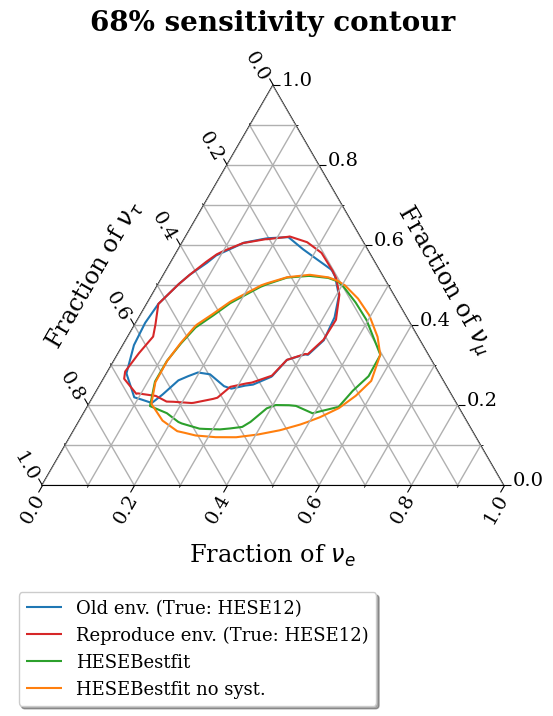

In [22]:
compare_contours( names = ["benchmark", "reproduce_benchmark","HESEBestfit","HESEBestfit_nosyst"], 
                  labels = ["Old env. (True: HESE12)", "Reproduce env. (True: HESE12)", "HESEBestfit", "HESEBestfit no syst."],
                  output_name = "spice_reproduce_benchmark_try_HESEBestfit")

FinalEventClass and FinalTopology give the exact same result. Did I apply the overrides correctly?

FinalEventClass
/scratch/tvaneede/NNMFit/condor/17_11_2025_23_20_34/logs/PrecalculateGraph.err
DEBUG:NNMFit.data_handling.data_handler: Reading file /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_FinalEventClass//dataset_IC86_pass2_SnowStorm_v2_FTP_v2_cascade.hdf (2025-11-17 17:24:53; data_handler.py:32)
DEBUG:NNMFit.core.mask_handler: Found 164613 events in binning (2025-11-17 17:24:57; mask_handler.py:156)
DEBUG:NNMFit.data_handling.data_handler: Reading file /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_FinalEventClass//dataset_IC86_pass2_SnowStorm_v2_FTP_v2_double.hdf (2025-11-17 17:24:57; data_handler.py:32)
DEBUG:NNMFit.core.mask_handler: Found 21693 events in binning (2025-11-17 17:24:57; mask_handler.py:156)
DEBUG:NNMFit.data_handling.data_handler: Reading file /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_FinalEventClass//dataset_IC86_pass2_SnowStorm_v2_FTP_v2_track.hdf (2025-11-17 17:24:58; data_handler.py:32)
DEBUG:NNMFit.core.mask_handler: Found 53702 events in binning (2025-11-17 17:24:58; mask_handler.py:156)

FinalTopology
DEBUG:NNMFit.data_handling.data_handler: Reading file /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_FinalTopology//dataset_IC86_pass2_SnowStorm_v2_FTP_v2_cascade.hdf (2025-11-17 17:23:53; data_handler.py:32)
DEBUG:NNMFit.core.mask_handler: Found 163922 events in binning (2025-11-17 17:24:00; mask_handler.py:156)
DEBUG:NNMFit.data_handling.data_handler: Reading file /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_FinalTopology//dataset_IC86_pass2_SnowStorm_v2_FTP_v2_double.hdf (2025-11-17 17:24:00; data_handler.py:32)
DEBUG:NNMFit.core.mask_handler: Found 22384 events in binning (2025-11-17 17:24:01; mask_handler.py:156)
DEBUG:NNMFit.data_handling.data_handler: Reading file /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_FinalTopology//dataset_IC86_pass2_SnowStorm_v2_FTP_v2_track.hdf (2025-11-17 17:24:01; data_handler.py:32)
DEBUG:NNMFit.core.mask_handler: Found 53702 events in binning (2025-11-17 17:24:02; mask_handler.py:156)

Slight differences! So it should work. I could still test the output histogram, see if there are no events with len < 20 m and high energy are in double cascade sample

/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


HESEBestfit_nosyst
C0
taureco_v2_FinalEventClass_NoMuon
C3
taureco_v2_FinalTopology_NoMuon
C2


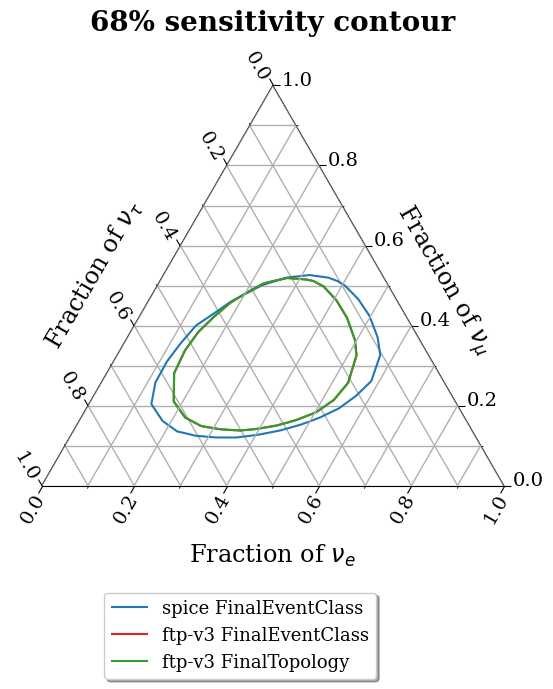

In [23]:
compare_contours( names = ["HESEBestfit_nosyst","taureco_v2_FinalEventClass_NoMuon","taureco_v2_FinalTopology_NoMuon"], 
                  labels = ["spice FinalEventClass", "ftp-v3 FinalEventClass", "ftp-v3 FinalTopology"],
                  output_name = "spice_ftp_FinalEventClass_FinalTopology")

/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


HESEBestfit_nosyst
C0
taureco_v2_FinalTopology_NoMuon
C3
taureco_v3_FinalTopology_NoMuon
C2


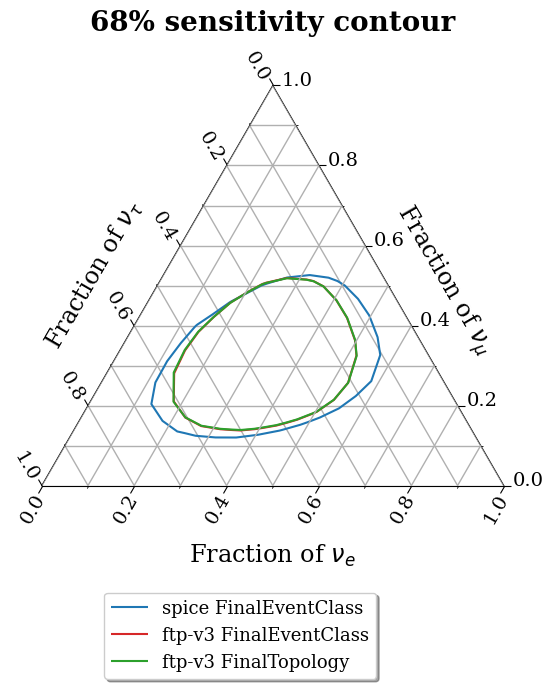

In [24]:
compare_contours( names = ["HESEBestfit_nosyst","taureco_v2_FinalTopology_NoMuon","taureco_v3_FinalTopology_NoMuon"], 
                  labels = ["spice FinalEventClass", "ftp-v3 FinalEventClass", "ftp-v3 FinalTopology"],
                  output_name = "spice_ftp_FinalTopology_v2_v3")

/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


HESEBestfit_nosyst
C0
taureco_v3_FinalTopology_NoMuon
C3
taureco_v3_FinalTopology
C2


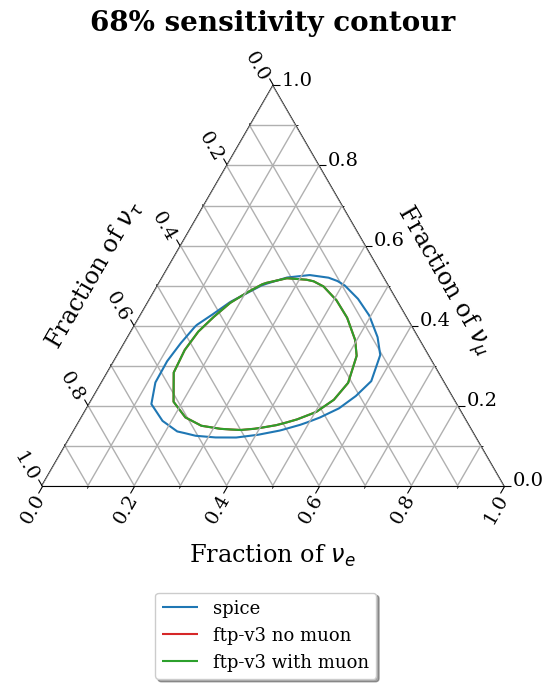

In [25]:
compare_contours( names = ["HESEBestfit_nosyst","taureco_v3_FinalTopology_NoMuon","taureco_v3_FinalTopology"], 
                  labels = ["spice", "ftp-v3 no muon", "ftp-v3 with muon"],
                  output_name = "spice_ftp_FinalTopology_with_without_muon")

/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


HESEBestfit_nosyst
C0
taureco_v3_FinalTopology
C3
taureco_v3_FinalTopology_extra_lowLen_bin
C2
taureco_v3_FinalTopology_extra_lowE_bin
C1


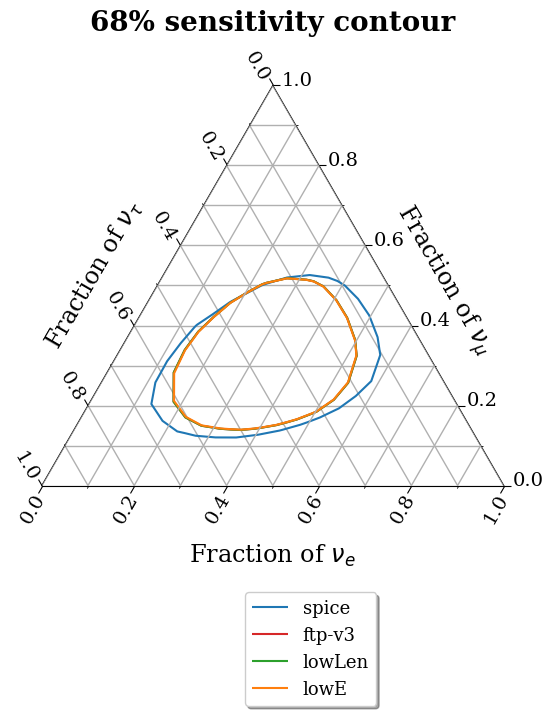

In [26]:
compare_contours( names = ["HESEBestfit_nosyst","taureco_v3_FinalTopology","taureco_v3_FinalTopology_extra_lowLen_bin","taureco_v3_FinalTopology_extra_lowE_bin"], 
                  labels = ["spice", "ftp-v3", "lowLen", "lowE"],
                  output_name = "spice_ftp_FinalTopology_lowLen_lowE")

A little summary: having the muongun events in my dataframe doesnt matter. I guess they are not weighted, because I already have a muongun template in the track channel.

I dont see an improvement/difference when adding a low energy/length bin. Is it actually properly incorporated?

Benchmark log: /scratch/tvaneede/NNMFit/condor/18_11_2025_17_11_49/logs/PrecalculateGraph.err
INFO:NNMFit.core.loader: Using dataset: /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_v3_FinalTopology//dataset_IC86_pass2_SnowStorm_v2_FTP_v3_double.hdf (2025-11-18 11:15:09; loader.py:104)
DEBUG:NNMFit.data_handling.data_handler: Reading file /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_v3_FinalTopology//dataset_IC86_pass2_SnowStorm_v2_FTP_v3_double.hdf (2025-11-18 11:15:09; data_handler.py:32)
DEBUG:NNMFit.data_handling.data_handler: Ignoring all keys except for None (2025-11-18 11:15:09; data_handler.py:33)
INFO:NNMFit.data_handling.data_handler: Setting analysis vars: ['reco_energy', 'reco_length'] (2025-11-18 11:15:10; data_handler.py:130)
WARNING:NNMFit.core.mask_handler: Please specify, which masks should be applied by adding 'apply_standard_mask = True/False' to your detector config. For now the mask will be applied, but this default will be deprecated in the future. (2025-11-18 11:15:10; mask_handler.py:65)
DEBUG:NNMFit.core.mask_handler: Found 26444 events in binning (2025-11-18 11:15:10; mask_handler.py:156)

Extra bin log: /scratch/tvaneede/NNMFit/condor/18_11_2025_17_28_12/logs/PrecalculateGraph.err
INFO:NNMFit.core.loader: Using dataset: /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_v3_FinalTopology//dataset_IC86_pass2_SnowStorm_v2_FTP_v3_double.hdf (2025-11-18 11:29:41; loader.py:104)
DEBUG:NNMFit.data_handling.data_handler: Reading file /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_v3_FinalTopology//dataset_IC86_pass2_SnowStorm_v2_FTP_v3_double.hdf (2025-11-18 11:29:41; data_handler.py:32)
DEBUG:NNMFit.data_handling.data_handler: Ignoring all keys except for None (2025-11-18 11:29:41; data_handler.py:33)
INFO:NNMFit.data_handling.data_handler: Setting analysis vars: ['reco_energy', 'reco_length'] (2025-11-18 11:29:41; data_handler.py:130)
WARNING:NNMFit.core.mask_handler: Please specify, which masks should be applied by adding 'apply_standard_mask = True/False' to your detector config. For now the mask will be applied, but this default will be deprecated in the future. (2025-11-18 11:29:41; mask_handler.py:65)
DEBUG:NNMFit.core.mask_handler: Found 26444 events in binning (2025-11-18 11:29:41; mask_handler.py:156)

They are exactly the same!! I am making a mistake with my override. Lets check the FitConfiguration

Benchmark: /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/dag_scans/recreate_neha_benchmark/output/taureco_v3_FinalTopology/Fit_Configuration.yaml
Not updated, but the binning is called 3D binning, while it is 2D binning.
Turns out, I had a comment in my yaml file that screwed things up. Now we will try again.

/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


HESEBestfit_nosyst
C0
taureco_v3_FinalTopology
C3
taureco_v3_FinalTopology_extra_lowLen_bin
C2
taureco_v3_FinalTopology_extra_lowE_bin
C1
taureco_v3_FinalTopology_extra_lowE_lowLen_bin
C4


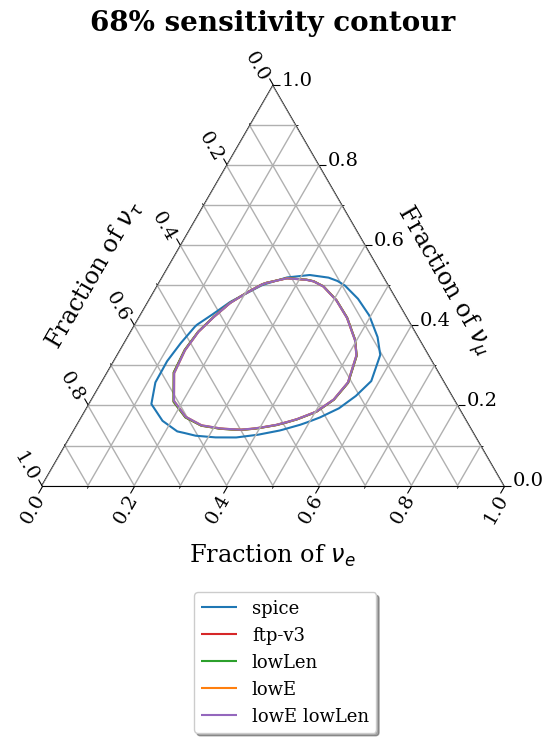

In [27]:
compare_contours( names = ["HESEBestfit_nosyst","taureco_v3_FinalTopology","taureco_v3_FinalTopology_extra_lowLen_bin",
                           "taureco_v3_FinalTopology_extra_lowE_bin","taureco_v3_FinalTopology_extra_lowE_lowLen_bin"], 
                  labels = ["spice", "ftp-v3", "lowLen", "lowE", "lowE lowLen"],
                  output_name = "spice_ftp_FinalTopology_lowLen_lowE_both")

I should have fixed it, but it doesnt change anything yet. The FitConfigurations seem ok:
/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/dag_scans/recreate_neha_benchmark/output/taureco_v3_FinalTopology_extra_lowE_bin/Fit_Configuration.yaml
/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/dag_scans/recreate_neha_benchmark/output/taureco_v3_FinalTopology_extra_lowLen_bin/Fit_Configuration.yaml
/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/dag_scans/recreate_neha_benchmark/output/taureco_v3_FinalTopology_extra_lowE_lowLen_bin/Fit_Configuration.yaml

Do we get a difference in events?
Benchmark log: /scratch/tvaneede/NNMFit/condor/18_11_2025_17_11_49/logs/PrecalculateGraph.err
INFO:NNMFit.core.loader: Using dataset: /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_v3_FinalTopology//dataset_IC86_pass2_SnowStorm_v2_FTP_v3_double.hdf (2025-11-18 11:15:09; loader.py:104)
DEBUG:NNMFit.data_handling.data_handler: Reading file /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_v3_FinalTopology//dataset_IC86_pass2_SnowStorm_v2_FTP_v3_double.hdf (2025-11-18 11:15:09; data_handler.py:32)
DEBUG:NNMFit.data_handling.data_handler: Ignoring all keys except for None (2025-11-18 11:15:09; data_handler.py:33)
INFO:NNMFit.data_handling.data_handler: Setting analysis vars: ['reco_energy', 'reco_length'] (2025-11-18 11:15:10; data_handler.py:130)
WARNING:NNMFit.core.mask_handler: Please specify, which masks should be applied by adding 'apply_standard_mask = True/False' to your detector config. For now the mask will be applied, but this default will be deprecated in the future. (2025-11-18 11:15:10; mask_handler.py:65)
DEBUG:NNMFit.core.mask_handler: Found 26444 events in binning (2025-11-18 11:15:10; mask_handler.py:156)
DEBUG:NNMFit.data_handling.data_handler: Applying mask, new n_events: 26444 (2025-11-18 11:15:10; data_handler.py:175)

Low length log
INFO:NNMFit.core.loader: Using dataset: /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_v3_FinalTopology//dataset_IC86_pass2_SnowStorm_v2_FTP_v3_NoMuon_double.hdf (2025-11-18 16:01:45; loader.py:104)
DEBUG:NNMFit.data_handling.data_handler: Reading file /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_v3_FinalTopology//dataset_IC86_pass2_SnowStorm_v2_FTP_v3_NoMuon_double.hdf (2025-11-18 16:01:45; data_handler.py:32)
DEBUG:NNMFit.data_handling.data_handler: Ignoring all keys except for None (2025-11-18 16:01:45; data_handler.py:33)
INFO:NNMFit.data_handling.data_handler: Setting analysis vars: ['reco_energy', 'reco_length'] (2025-11-18 16:01:45; data_handler.py:130)
WARNING:NNMFit.core.mask_handler: Please specify, which masks should be applied by adding 'apply_standard_mask = True/False' to your detector config. For now the mask will be applied, but this default will be deprecated in the future. (2025-11-18 16:01:45; mask_handler.py:65)
DEBUG:NNMFit.core.mask_handler: Found 26444 events in binning (2025-11-18 16:01:45; mask_handler.py:156)
DEBUG:NNMFit.data_handling.data_handler: Applying mask, new n_events: 26444 (2025-11-18 16:01:45; data_handler.py:175)


Still?!?!?

Ah fuck it makes sense, the double cascade selection already caps at 10 m, so it doens't change anything to go below.. But for the energy it should make a difference?

Low energy log: /scratch/tvaneede/NNMFit/condor/18_11_2025_21_57_20/logs/PrecalculateGraph.err
DEBUG:NNMFit.data_handling.data_handler: Reading file /data/user/tvaneede/GlobalFit/reco_processing/NNMFit/datasets/reproduce_flavor_neha/SnowStorm_v2_HESE_Baseline_v3_FinalTopology//dataset_IC86_pass2_SnowStorm_v2_FTP_v3_NoMuon_double.hdf (2025-11-18 16:02:03; data_handler.py:32)
DEBUG:NNMFit.data_handling.data_handler: Ignoring all keys except for None (2025-11-18 16:02:03; data_handler.py:33)
INFO:NNMFit.data_handling.data_handler: Setting analysis vars: ['reco_energy', 'reco_length'] (2025-11-18 16:02:04; data_handler.py:130)
WARNING:NNMFit.core.mask_handler: Please specify, which masks should be applied by adding 'apply_standard_mask = True/False' to your detector config. For now the mask will be applied, but this default will be deprecated in the future. (2025-11-18 16:02:04; mask_handler.py:65)
DEBUG:NNMFit.core.mask_handler: Found 26736 events in binning (2025-11-18 16:02:04; mask_handler.py:156)

Yes here we see a slight difference. I have just been stupid. This was a stupid idea.

HESEBestfit_nosyst
C0
taureco_v3_FinalTopology
C3
taureco_v3_FinalTopology_extra_lowLen_bin
C2
taureco_v3_FinalTopology_extra_lowLen_bin_manual
C1


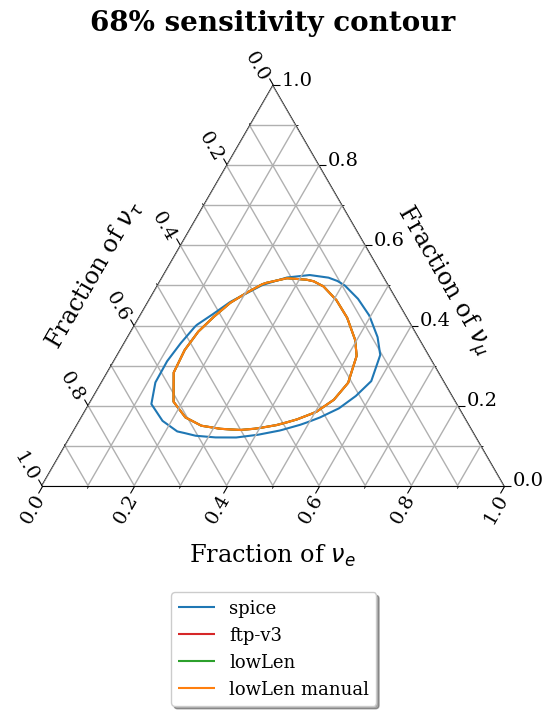

In [29]:
compare_contours( names = ["HESEBestfit_nosyst","taureco_v3_FinalTopology","taureco_v3_FinalTopology_extra_lowLen_bin","taureco_v3_FinalTopology_extra_lowLen_bin_manual"], 
                  labels = ["spice", "ftp-v3", "lowLen", "lowLen manual"],
                  output_name = "spice_ftp_FinalTopology_lowLen_manual")

Now I did a check where I used the muon template, and one where I just reweight the muons.

The reweight gives slightly better results, probably because I underestimate the number of muons. Good to know I can just use this method for testing.

/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


taureco_v4_FinalTopology_muonReweight
C0
taureco_v4_FinalTopology_muonTemplateTrack
C3


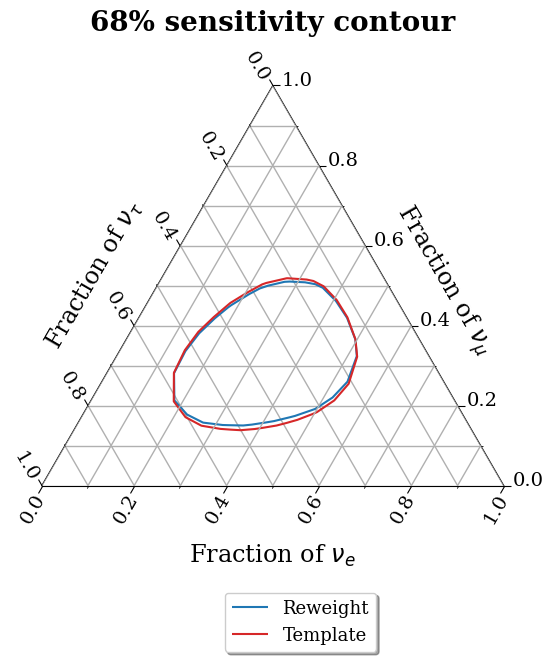

In [13]:
compare_contours( names = ["taureco_v4_FinalTopology_muonReweight", "taureco_v4_FinalTopology_muonTemplateTrack"], 
                  labels = ["Reweight","Template"],
                  output_name = "ftp_FinalTopology_muonReweight_muonTemplateTrack")

Lets make some pretty plots for the group meeting nov 20 2025

/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


HESEBestfit_nosyst
C0
taureco_v3_FinalTopology_NoMuon
C3


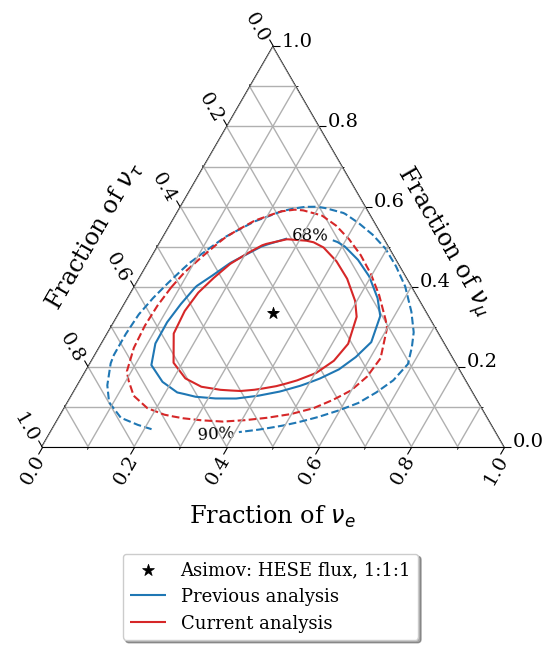

In [33]:
# plots for gr

levels = [2.37, 4.605]#,4.605]#4.605#, 5.99]
levlabels = ['68%', '90%']#'90% CL']#,'95% CL']

fig = plt.figure()
tax = flavor_triangle()

lh, ll = [], []

colours = ["C0","C3","C2", "C1", "C4", "C5", "C6", "C7", "C8", "C9"]

C = {}

ll = []
lh = []

# best fit
traditional = tax.ca.scatter([1.0/3], [1.0/3], marker='*', facecolor='black',
                  edgecolor='k', lw=0.5, s=80)
lh.append(traditional)
ll.append('Asimov: HESE flux, 1:1:1')

labels = { 
    "HESEBestfit_nosyst" : "Previous analysis", 
    "taureco_v3_FinalTopology_NoMuon" : "Current analysis", 
 }

fmt={} # set labels to the contours

i = 0

for name in ["HESEBestfit_nosyst","taureco_v3_FinalTopology_NoMuon"]: 
# for name in ["HESEBestfit_nosyst"]: 
    
    print(name)
    print(colours[i])
    C[name] = tax.ca.contour(data[name]["ft_grid_asimov_poisson"],
                            data[name]["fe_grid_asimov_poisson"],
                            data[name]["ts_grid_asimov_poisson"], 
                            levels,
                            linestyles=["-","--"],
                            linewidths=1.5,
                            colors=colours[i])
    
    h, _ = C[name].legend_elements()
    lh.append(h[0]) # legend elements
    ll.append(labels[name])

    if i == 0:
        for l, s in zip(C[name].levels, levlabels):
            fmt[l] = s
        plt.clabel(C[name],levels,inline=True,fontsize=12.,
                fmt=fmt,colors='black')


    i+=1


l = fig.legend(lh,ll,
                bbox_to_anchor=(0.77, 0.05),prop=font_legend,
                ncols=1,frameon=True,fancybox=True,shadow=True)
# tax.add_artist(l1)
# plt.title('68% sensitivity contour',y=1.1,fontdict=font_title)    

# plt.savefig(f"{plotting_path}/contour_spice.pdf",bbox_inches='tight')
plt.savefig(f"{plotting_path}/contour_spice_ftp.pdf",bbox_inches='tight')


In [34]:
def polygon_area(x, y):
    # Close path if not already closed
    if x[0] != x[-1] or y[0] != y[-1]:
        x = np.append(x, x[0])
        y = np.append(y, y[0])
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

In [37]:
areas = {}

for name in ["HESEBestfit_nosyst","taureco_v3_FinalTopology_NoMuon"]: 
    print(f"Processing {name}")
    contour_obj = C[name]
    area_list = []
    for i, level in enumerate(levels):  # 68%, 90%
        paths = contour_obj.collections[i].get_paths()
        level_area = 0.0
        for p in paths:
            v = p.vertices
            x, y = v[:, 0], v[:, 1]
            level_area += polygon_area(x, y)
        area_list.append(level_area)
        print(f"Area for level {levlabels[i]} ({level}): {level_area:.4f}")
    areas[name] = area_list

# Now calculate and print ratio of areas at 68% CL (index 0) and 90% CL (index 1)
for i, label in enumerate(levlabels):
    ratio = areas["taureco_v3_FinalTopology_NoMuon"][i] / areas["HESEBestfit_nosyst"][i]
    print(f"Area ratio (new / bench) at {label}: {ratio:.4f}")

Processing HESEBestfit_nosyst
Area for level 68% (2.37): 0.1432
Area for level 90% (4.605): 0.2725
Processing taureco_v3_FinalTopology_NoMuon
Area for level 68% (2.37): 0.1118
Area for level 90% (4.605): 0.2152
Area ratio (new / bench) at 68%: 0.7807
Area ratio (new / bench) at 90%: 0.7895


/tmp/ipykernel_937699/3404510874.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  paths = contour_obj.collections[i].get_paths()
/tmp/ipykernel_937699/3404510874.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  paths = contour_obj.collections[i].get_paths()
/tmp/ipykernel_937699/3404510874.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  paths = contour_obj.collections[i].get_paths()
/tmp/ipykernel_937699/3404510874.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  paths = contour_obj.collections[i].get_paths()
